# Task 1

In [4]:
import cv2
import numpy as np

video_path = r"C:\Users\Ganesh Reddy\OneDrive\Desktop\final vide0.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame
ret, prev_frame = cap.read()

if not ret:
    print("Error: Could not read the video frame.")
    exit()

# Convert the first frame to grayscale
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Initialize a kernel for morphological operations (optional)
kernel = np.ones((5, 5), np.uint8)

# Get the frames per second (FPS) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Get the current timestamp of the frame (in seconds)
    frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
    timestamp = frame_number / fps

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    diff = cv2.absdiff(prev_gray, gray)

    # Apply a threshold to the difference image to get the regions with significant changes
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Optional: Apply morphological operations to remove noise and fill in the gaps
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours of the detected motion
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the detected motion regions
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue  # Ignore small movements
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Add label "Motion" on top of the detected motion box
        cv2.putText(frame, "Motion", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Format and display the timestamp on the frame
    timestamp_text = f"Timestamp: {timestamp:.2f} seconds"
    cv2.putText(frame, timestamp_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with motion detection and timestamp
    cv2.imshow("Motion Detection", frame)

    # Update the previous frame
    prev_gray = gray.copy()

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

BELOW GIVEN ARE THE RESULTS OF DETECTING THE MOTION ALONG WITH TIME STAMP OF THE FRAME FROM THE VIDEO

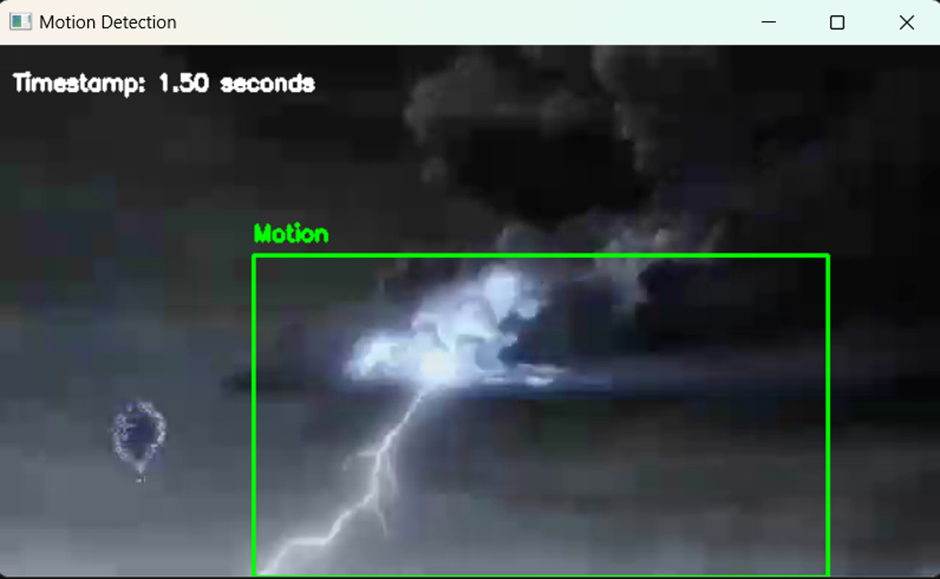

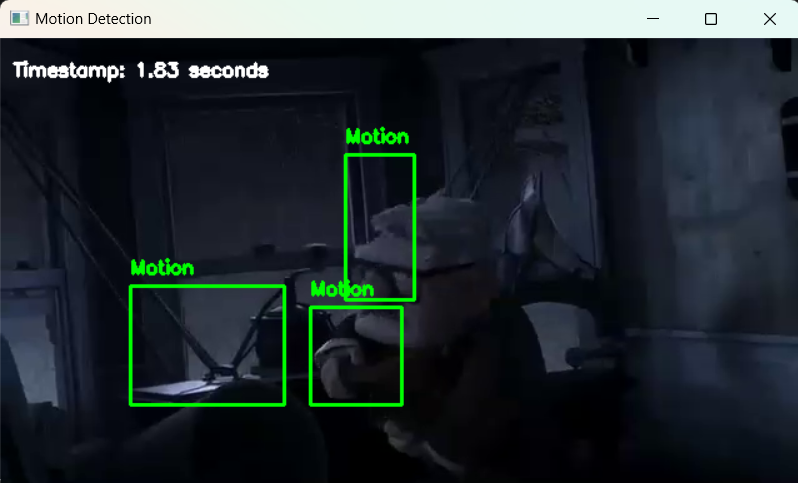

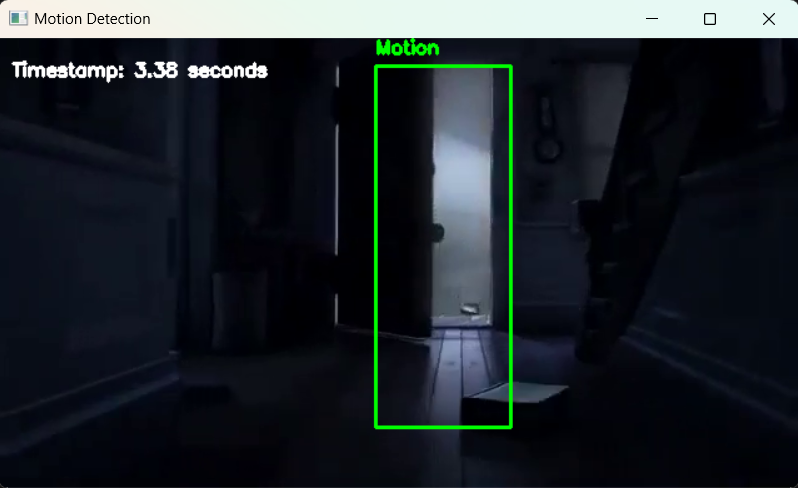

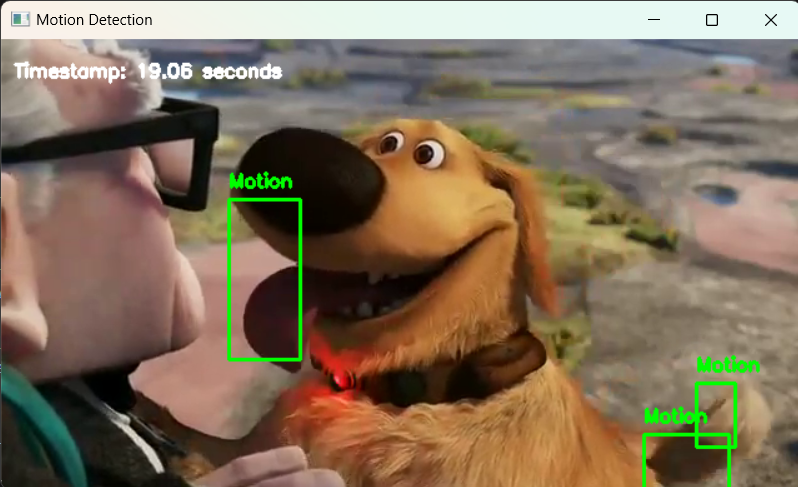

# Task 2

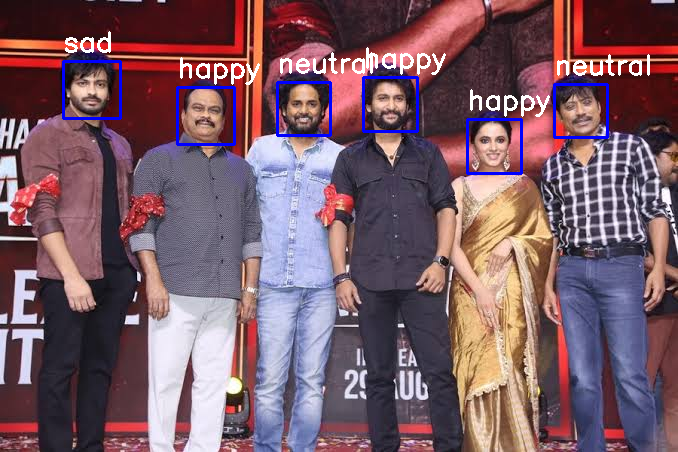

Detected Emotions: ['sad', 'happy', 'neutral', 'happy', 'neutral', 'happy']
Overall Crowd Sentiment: happy with 3 instances


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained Haar cascades for face, smile, and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect faces using Haar cascades
def detect_faces(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    return faces

# Function to classify facial expressions (based on smile and eyes detection)
def classify_emotion(face_img):
    gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

    # Detect smiles
    smiles = smile_cascade.detectMultiScale(gray_face, scaleFactor=1.8, minNeighbors=20)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=10)

    if len(smiles) > 0:
        return "happy"
    elif len(eyes) > 0:
        return "neutral"
    else:
        return "sad"

# Main function to process the crowd image
def process_image(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        print("Error: Image not found.")
        return

    # Detect faces in the image
    faces = detect_faces(img)

    sentiments = []

    for (x, y, w, h) in faces:
        # Extract face region
        face_img = img[y:y+h, x:x+w]

        # Classify emotion for the face
        emotion = classify_emotion(face_img)
        sentiments.append(emotion)

        # Draw rectangle around face and label the emotion
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

    # Majority sentiment in the crowd
    if sentiments:  # Check if sentiments list is not empty
        overall_sentiment = max(set(sentiments), key=sentiments.count)
        print(f"Detected Sentiments: {sentiments}")
        print(f"Overall Crowd Sentiment: {overall_sentiment}")
    else:
        print("No faces detected.")

    # Convert BGR image to RGB format for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.title('Crowd Emotion Detection')
    plt.show()

# Example usage
image_path = r"C:\Users\Ganesh Reddy\OneDrive\Desktop\crowd_images"
process_image(image_path)



# Task 3

Processing Male Images...
Geometric Features for Face:
Jaw Width: 64
Eye Distance: 25
Nose Width: 16
Jaw to Eye Ratio: 2.56
Nose to Jaw Ratio: 0.25
Geometric Features for Face:
Jaw Width: 89
Eye Distance: 35
Nose Width: 22
Jaw to Eye Ratio: 2.5428571428571427
Nose to Jaw Ratio: 0.24719101123595505
Geometric Features for Face:
Jaw Width: 255
Eye Distance: 102
Nose Width: 63
Jaw to Eye Ratio: 2.5
Nose to Jaw Ratio: 0.24705882352941178
Processing Female Images...
Geometric Features for Face:
Jaw Width: 68
Eye Distance: 27
Nose Width: 17
Jaw to Eye Ratio: 2.5185185185185186
Nose to Jaw Ratio: 0.25
Geometric Features for Face:
Jaw Width: 116
Eye Distance: 46
Nose Width: 29
Jaw to Eye Ratio: 2.5217391304347827
Nose to Jaw Ratio: 0.25
Geometric Features for Face:
Jaw Width: 53
Eye Distance: 21
Nose Width: 13
Jaw to Eye Ratio: 2.5238095238095237
Nose to Jaw Ratio: 0.24528301886792453
Geometric Features for Face:
Jaw Width: 112
Eye Distance: 44
Nose Width: 28
Jaw to Eye Ratio: 2.545454545454545

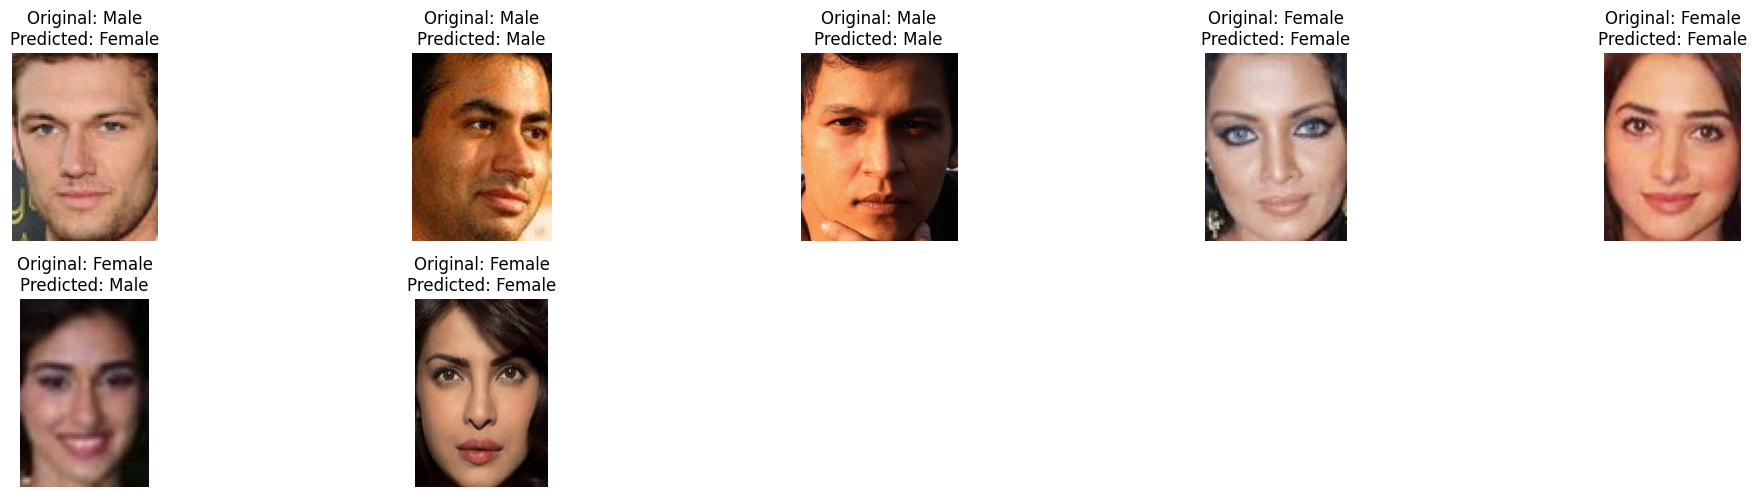

In [6]:
# Required Libraries
import cv2
import numpy as np
import os
from math import sqrt
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Load the face detection model (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces and crop them
def detect_and_crop_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # If no faces are detected, return None
    if len(faces) == 0:
        return None
    
    # Return cropped faces for all detected faces (process all)
    cropped_faces = []
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Cropped face
        cropped_faces.append(face)
    return cropped_faces

# Geometric feature extraction: distance between key landmarks (using simple assumptions for landmarks)
def calculate_geometric_features(face):
    height, width = face.shape
    # Estimate key landmarks based on face proportions (assumed for simplicity)
    eye_level = int(height * 0.35)
    nose_level = int(height * 0.5)
    jaw_level = int(height * 0.85)
    
    # Approximate key measurements
    forehead_width = width * 0.75  # Approximate forehead width as a fraction of face width
    jaw_width = width  # Approximate jaw width
    nose_width = int(width * 0.25)  # Approximate nose width
    eye_distance = int(width * 0.4)  # Approximate distance between eyes
    
    # Ratios for more robust geometric rules
    jaw_to_eye_ratio = jaw_width / eye_distance
    nose_to_jaw_ratio = nose_width / jaw_width
    
    # Print the calculated geometric features for debugging
    print(f"Geometric Features for Face:")
    print(f"Jaw Width: {jaw_width}")
    print(f"Eye Distance: {eye_distance}")
    print(f"Nose Width: {nose_width}")
    print(f"Jaw to Eye Ratio: {jaw_to_eye_ratio}")
    print(f"Nose to Jaw Ratio: {nose_to_jaw_ratio}")
    
    return jaw_to_eye_ratio, nose_to_jaw_ratio

# Texture-based feature extraction using LBP (Local Binary Patterns)
def calculate_texture_features(face):
    # LBP parameters
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(face, n_points, radius, method="uniform")
    
    # Calculate the histogram of LBP patterns
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # Normalize the histogram to make it comparable
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)  # Avoid division by zero
    
    return hist

# Rule-based gender classification
def classify_gender(geometric_features, texture_features):
    jaw_to_eye_ratio, nose_to_jaw_ratio = geometric_features
    
    
    # Using both geometric and texture features for classification
    if jaw_to_eye_ratio > 1.5 and nose_to_jaw_ratio < 0.25:  # More likely male with broad jaw
        return 'Male'
    else:
        # If jaw features are softer, consider texture-based features
        texture_sum = sum(texture_features[:5])  # Focus on the first few LBP bins
        if texture_sum < 0.9:  # Softer texture may indicate female
            return 'Female'
        else:
            return 'Male'

# Function to process images from a folder and classify gender
def process_images_in_folder(folder_path, gender_label):
    results = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)
            cropped_faces = detect_and_crop_face(image)
            
            if cropped_faces is not None:
                for face in cropped_faces:  # Process all detected faces
                    geometric_features = calculate_geometric_features(face)
                    texture_features = calculate_texture_features(face)
                    predicted_gender = classify_gender(geometric_features, texture_features)
                    
                    # Save results including image, predicted and actual gender
                    results.append((filename, image, predicted_gender, gender_label))
    
    return results

# Plot images with original and predicted gender
def plot_results(results):
    plt.figure(figsize=(20, 10))
    
    for i, (filename, image, predicted_gender, actual_gender) in enumerate(results):
        plt.subplot(4, 5, i + 1)  # Plotting 20 images in a 4x5 grid
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.title(f"Original: {actual_gender}\nPredicted: {predicted_gender}")
        plt.axis('off')  # Turn off axis display
    
    plt.tight_layout()
    plt.show()

# Paths for male and female folders
male_folder = r"C:\Users\Ganesh Reddy\OneDrive\Desktop\men"
female_folder = r"C:\Users\Ganesh Reddy\OneDrive\Desktop\women"

# Process male and female images
print("Processing Male Images...")
male_results = process_images_in_folder(male_folder, 'Male')

print("Processing Female Images...")
female_results = process_images_in_folder(female_folder, 'Female')

# Combine male and female results
all_results = male_results + female_results

# Plot the results with original and predicted gender
plot_results(all_results)
